In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

q1_part(a)

In [241]:
houses = pd.read_csv("C:/Users/acer/Desktop/ML_Hw1/house_prices.csv")
print(houses)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     parking   price  
0          2  791000  
1          3  919000  
2          2  994000  
3          3  81100

In [242]:
X = houses.drop(columns=['price']).to_numpy()
Y = houses['price'].to_numpy().reshape(-1, 1)

X.shape, Y.shape

((545, 8), (545, 1))

In [243]:
def zscore_normalize_features(X):
    
    # find the mean of each column/feature
    mu = np.mean(X, axis=0) 
    
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0) 
    
    #subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm

In [244]:
def min_max_norm(X , Y):
    X_norm = (X - X.min()) / (X.max() - X.min())
    #y_norm = (Y - Y.min()) / (Y.max() - Y.min())
    return X_norm

In [245]:
# normalize the original features
#X_norm = zscore_normalize_features(X)
#X_norm

In [246]:
X_norm = min_max_norm(X , Y)

In [247]:
X_bias = np.ones((X.shape[0],1))
Xnew = np.hstack((X_norm,X_bias))
Xnew

array([[4.58024691e-01, 2.46913580e-04, 1.23456790e-04, ...,
        0.00000000e+00, 1.23456790e-04, 1.00000000e+00],
       [5.53086420e-01, 2.46913580e-04, 2.46913580e-04, ...,
        0.00000000e+00, 1.85185185e-04, 1.00000000e+00],
       [6.14814815e-01, 1.85185185e-04, 1.23456790e-04, ...,
        6.17283951e-05, 1.23456790e-04, 1.00000000e+00],
       ...,
       [2.23456790e-01, 1.23456790e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.79629630e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.37654321e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

q1_part(b)

In [248]:
def calculate_cost_func(X , Y , w):
    
    f_model = np.dot(X, w)
    cost = np.sum((f_model-Y)**2)
    
    final_cost = cost/(2*Y.shape[0])
    
    return final_cost  

In [249]:
def calculate_gradiant(X , Y , w):
    new_dw=np.zeros([X.shape[1], 1])
    #print(new_dw)
    
    for j in range(Y.shape[0]):
        error = np.dot(X[j] , w) - Y[j]
        for i in range(X.shape[1]):
            new_dw[i] = new_dw[i] + error * X[j,i]
            #print(new_dw[i])
    #print(new_dw)  
    new_dw = new_dw/Y.shape[0]
    #print(new_dw)
    #print(new_db.shape)
    return new_dw

In [250]:
def batch_gradiant(X , Y , w , alpha , iteration):
    cost_history=[]
    
    for i in range(iteration):
        new_dw = calculate_gradiant(X , Y , w)
    #print(new_dw)
    #print(new_db)
        w = w - (alpha * new_dw)
    #print(w.shape) 
        cost = calculate_cost_func(X , Y , w)
        cost_history.append(cost)
    return cost_history , w

In [264]:
w=np.ones([Xnew.shape[1], 1])

from datetime import datetime 
start_time = datetime.now() 

cost_list , w = batch_gradiant(Xnew , Y , w , 0.01, 100)

print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

updated_w = w
print(cost_list[99])

Time elapsed (hh:mm:ss.ms) 0:00:01.026254
30057822271.41042


In [235]:
MyModel_MSE = calculate_cost_func(Xnew , Y , updated_w)
print(MyModel_MSE)

30057822271.41042


Text(0, 0.5, 'Cost')

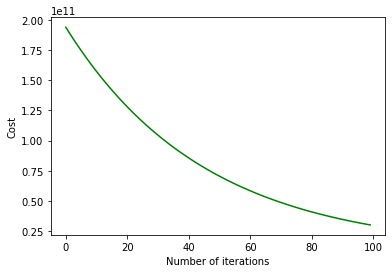

In [236]:
plt.plot(range(100), cost_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

q1_partc

In [185]:
X_test = np.array([7700, 3, 2, 1, 1, 0, 0, 2, 1])
#X_test_norm = zscore_normalize_features(X_test)
#n12 = np.squeeze(np.asarray(X_test_norm))
#print(n12)
f_model = np.dot(X_test , updated_w) 
print(f_model)

[1.05674369e+09]


q1_part_D

In [186]:
def calculate_SGD(X , Y , w , alpha , iteration):
    cost_history=[0] * iteration
    #cost_history=[]
    for i in range(iteration):
        for j in range(Y.shape[0]):
            index = np.random.randint(Y.shape[0])
            Yj= Y[index:index+1]
            Xj= X[index:index+1]
            
            f_model = np.dot(Xj, w)
            w = w - alpha * 2 * Xj.T.dot(f_model-Yj)
            #cost = calculate_cost_func(Xj , Yj , w)
            #cost_history.append(cost)
            cost_history[i] = calculate_cost_func(Xj , Yj , w)
            
    return cost_history , w

In [187]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list , w = calculate_SGD(Xnew , Y , w , 0.01 , 100)
print(SGD_cost_list[99])

422899194.99732876


Text(0, 0.5, 'Cost')

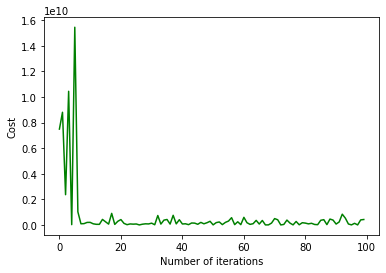

In [188]:
plt.plot(range(100), SGD_cost_list, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [189]:
def create_mini_batches(X, Y, batch_size):
    mini_batches = []
    data = np.hstack((X, Y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [190]:
def calculate_mini_batch_grad(X , Y , w , alpha , iteration , batch_size):
    cost_history = []
    
    for i in range(iteration):
        mini_batches = create_mini_batches(X, Y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            f_model = np.dot(X_mini,w)
            w = w - (alpha * (np.dot(X_mini.T , (f_model-y_mini))/batch_size))
            cost = calculate_cost_func(X_mini, y_mini , w)
            cost_history.append(cost)
    return cost_history , w

In [191]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 0.7 , 1000 , 16)
print(len(BGD_cost_list))
print(BGD_cost_list[99])

36000
495090860.7162784


Text(0, 0.5, 'Cost')

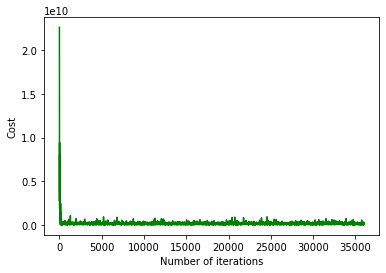

In [192]:
plt.plot(range(36000), BGD_cost_list, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [227]:
min_GD_cost = min(cost_list)
min_SGD_cost = min(SGD_cost_list)
min_BGD_cost = min(BGD_cost_list)

print(min_SGD_cost)
print(min_BGD_cost)
print(min_GD_cost)

35194.733872397315
59.085324444057285
7173704430.830024


q1_part_e

with alpha = 0.9 bigger alpha

In [230]:
w=np.ones([Xnew.shape[1], 1])
GD_cost_list2 , w = batch_gradiant(Xnew , Y , w , 0.9, 100)

Text(0, 0.5, 'Cost')

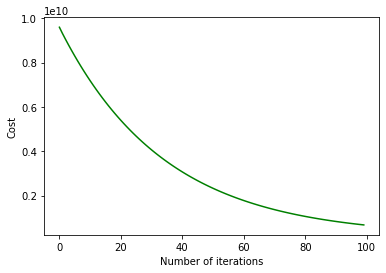

In [231]:
plt.plot(range(100), GD_cost_list2, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [232]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list2 , w = calculate_SGD(Xnew , Y , w , 0.9 , 100)
len(SGD_cost_list)

100

Text(0, 0.5, 'Cost')

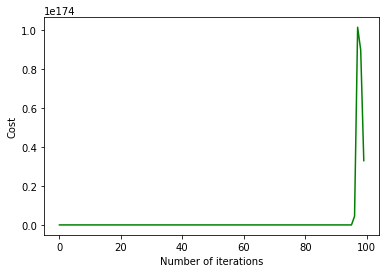

In [197]:
plt.plot(range(100), SGD_cost_list2, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [198]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list2 , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 0.9 , 1000 , 16)
len(BGD_cost_list)

36000

Text(0, 0.5, 'Cost')

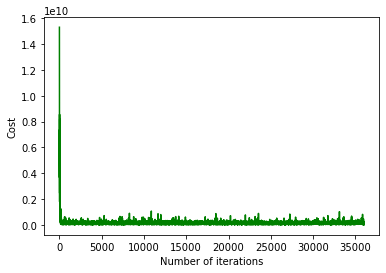

In [199]:
plt.plot(range(36000), BGD_cost_list2, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

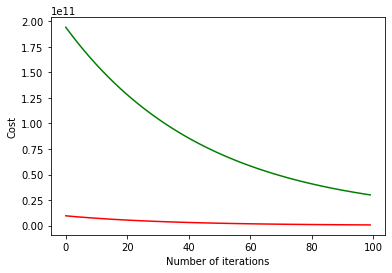

In [237]:
#alpha = 0.9
plt.plot(range(100), GD_cost_list2, c='red') 

#alpha = 0.01
plt.plot(range(100), cost_list, c='green')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")


Text(0, 0.5, 'Cost')

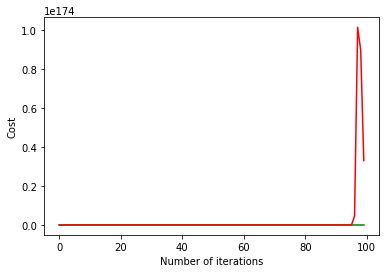

In [202]:
#alpha=0.01
plt.plot(range(100), SGD_cost_list, c='green')

#alpha=0.9
plt.plot(range(100), SGD_cost_list2, c='red')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

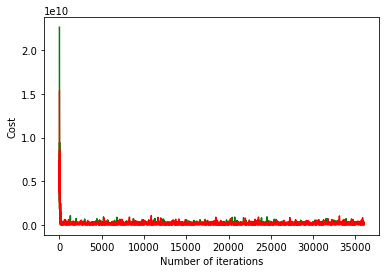

In [203]:
plt.plot(range(36000), BGD_cost_list, c='green')
plt.plot(range(36000), BGD_cost_list2, c='red')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")

alpha = 1e-8 , smaller alpha 

In [204]:
w=np.ones([Xnew.shape[1], 1])
GD_cost_list3 , w = batch_gradiant(Xnew , Y , w , 1e-8, 100)

In [205]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list3 , w = calculate_SGD(Xnew , Y , w , 1e-8 , 100)

In [211]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list3 , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 1e-8 , 1000 , 16)

Text(0, 0.5, 'Cost')

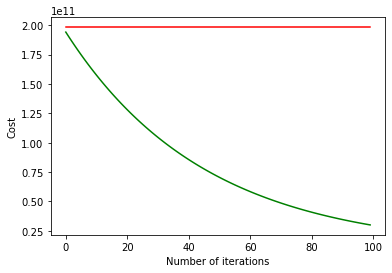

In [207]:
#alpha = 1e-8
plt.plot(range(100), GD_cost_list3, c='red') 

#alpha = 0.001
plt.plot(range(100), cost_list, c='green')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

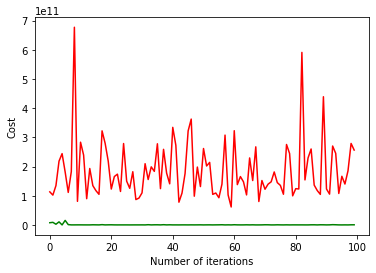

In [208]:
#alpha=0.001
plt.plot(range(100), SGD_cost_list, c='green')

#alpha = 1e-8
plt.plot(range(100), SGD_cost_list3, c='red')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

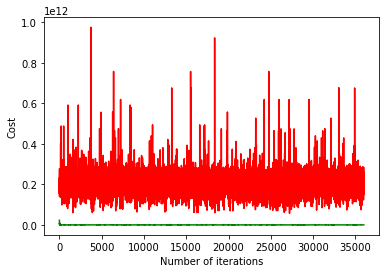

In [212]:
plt.plot(range(36000), BGD_cost_list, c='green')
plt.plot(range(36000), BGD_cost_list3, c='red')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")

q1_part_F

In [261]:
from sklearn.linear_model import LinearRegression as LinearRegression2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [262]:
X = houses.drop(columns=['price']).to_numpy()
Y = houses['price'].to_numpy().reshape(-1, 1)

X_norm = min_max_norm(X , Y)
X_bias = np.ones((X.shape[0],1))
X_new = np.hstack((X_norm,X_bias))
X_new

array([[4.58024691e-01, 2.46913580e-04, 1.23456790e-04, ...,
        0.00000000e+00, 1.23456790e-04, 1.00000000e+00],
       [5.53086420e-01, 2.46913580e-04, 2.46913580e-04, ...,
        0.00000000e+00, 1.85185185e-04, 1.00000000e+00],
       [6.14814815e-01, 1.85185185e-04, 1.23456790e-04, ...,
        6.17283951e-05, 1.23456790e-04, 1.00000000e+00],
       ...,
       [2.23456790e-01, 1.23456790e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.79629630e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.37654321e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [263]:
reg = LinearRegression2()
from datetime import datetime 
start_time = datetime.now() 
reg.fit(X_new, Y)

y_pred = reg.predict(X_new)

print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

print(f"weights(sklearn): {reg.coef_}")
print(f"Mean squared error(sklearn): {mean_squared_error(Y, y_pred)}")

Time elapsed (hh:mm:ss.ms) 0:00:00.089159
weights(sklearn): [[1.17834545e+06 2.37669076e+07 3.24534505e+07 1.27962907e+08
  2.04126567e+08 7.75708091e+07 4.21075114e+08 1.33125005e+08
  0.00000000e+00]]
Mean squared error(sklearn): 32164897.032794468


In [113]:
MyModel_MSE = calculate_cost_func(Xnew , Y , updated_w)
print(MyModel_MSE)

160878446204.26193
